In [56]:
# grader-required-cell

import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [57]:
# load the dataset from the data directory

for dirname, _, filenames in os.walk('../dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../dataset/prediction\prediction\ba17.png
../dataset/prediction\prediction\ba49.mine2.png
../dataset/prediction\prediction\ca2.png
../dataset/prediction\prediction\da5.png
../dataset/prediction\prediction\dha11.png
../dataset/prediction\prediction\ga16.png
../dataset/prediction\prediction\ha0.png
../dataset/prediction\prediction\ja12.png
../dataset/prediction\prediction\ka4.png
../dataset/prediction\prediction\la9.png
../dataset/prediction\prediction\ma.0.jpg
../dataset/prediction\prediction\ma.1.jpg
../dataset/prediction\prediction\ma15.png
../dataset/prediction\prediction\na1.png
../dataset/prediction\prediction\nga19.png
../dataset/prediction\prediction\nga220.pred.png
../dataset/prediction\prediction\nya14.png
../dataset/prediction\prediction\pa10.png
../dataset/prediction\prediction\ra164.pred.png
../dataset/prediction\prediction\ra3.png
../dataset/prediction\prediction\sa7.png
../dataset/prediction\prediction\ta6.png
../dataset/prediction\prediction\tha18.png
../dataset/predictio

In [58]:
import os
import zipfile

In [59]:
ba_dir = os.path.join('../dataset/v3/v3/train/ba')
ca_dir = os.path.join('../dataset/v3/v3/train/ca')
da_dir = os.path.join('../dataset/v3/v3/train/da')
dha_dir = os.path.join('../dataset/v3/v3/train/dha')
ga_dir = os.path.join('../dataset/v3/v3/train/ga')
ha_dir = os.path.join('../dataset/v3/v3/train/ha')
ja_dir = os.path.join('../dataset/v3/v3/train/ja')
ka_dir = os.path.join('../dataset/v3/v3/train/ka')
la_dir = os.path.join('../dataset/v3/v3/train/la')
ma_dir = os.path.join('../dataset/v3/v3/train/ma')
na_dir = os.path.join('../dataset/v3/v3/train/na')
nga_dir = os.path.join('../dataset/v3/v3/train/nga')
nya_dir = os.path.join('../dataset/v3/v3/train/nya')
pa_dir = os.path.join('../dataset/v3/v3/train/pa')
ra_dir = os.path.join('../dataset/v3/v3/train/ra')
sa_dir = os.path.join('../dataset/v3/v3/train/sa')
ta_dir = os.path.join('../dataset/v3/v3/train/ta')
tha_dir = os.path.join('../dataset/v3/v3/train/tha')
wa_dir = os.path.join('../dataset/v3/v3/train/wa')
ya_dir = os.path.join('../dataset/v3/v3/train/ya')

print('Total training ba images:', len(os.listdir(ba_dir)))
print('Total training ca images:', len(os.listdir(ca_dir)))
print('Total training da images:', len(os.listdir(da_dir)))
print('Total training dha images:', len(os.listdir(dha_dir)))
print('Total training ga images:', len(os.listdir(ga_dir)))
print('Total training ha images:', len(os.listdir(ha_dir)))
print('Total training ja images:', len(os.listdir(ja_dir)))
print('Total training ka images:', len(os.listdir(ka_dir)))
print('Total training la images:', len(os.listdir(la_dir)))
print('Total training ma images:', len(os.listdir(ma_dir)))
print('Total training na images:', len(os.listdir(na_dir)))
print('Total training nga images:', len(os.listdir(nga_dir)))
print('Total training nya images:', len(os.listdir(nya_dir)))
print('Total training pa images:', len(os.listdir(pa_dir)))
print('Total training ra images:', len(os.listdir(ra_dir)))
print('Total training sa images:', len(os.listdir(sa_dir)))
print('Total training ta images:', len(os.listdir(ta_dir)))
print('Total training tha images:', len(os.listdir(tha_dir)))
print('Total training wa images:', len(os.listdir(wa_dir)))
print('Total training ya images:', len(os.listdir(ya_dir)))

Total training ba images: 114
Total training ca images: 108
Total training da images: 108
Total training dha images: 108
Total training ga images: 108
Total training ha images: 102
Total training ja images: 108
Total training ka images: 108
Total training la images: 108
Total training ma images: 108
Total training na images: 108
Total training nga images: 102
Total training nya images: 108
Total training pa images: 108
Total training ra images: 108
Total training sa images: 108
Total training ta images: 108
Total training tha images: 108
Total training wa images: 108
Total training ya images: 108


Sample 'wa' image:


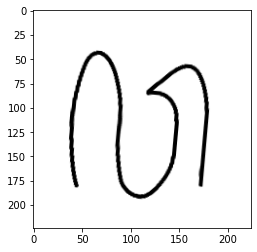

Sample 'ca' image:


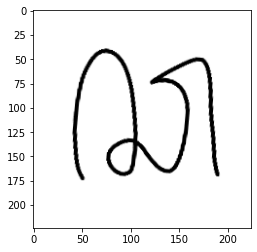

In [60]:
# example of the 'wa' letter on the dataset

print("Sample 'wa' image:")
plt.imshow(load_img(f"{os.path.join(wa_dir, os.listdir(wa_dir)[5])}"))
plt.show()

# example of the 'ca' letter on the dataset
print("Sample 'ca' image:")
plt.imshow(load_img(f"{os.path.join(ca_dir, os.listdir(ca_dir)[5])}"))
plt.show()

In [61]:
# Doing some data Augmentation to tackle overfitting problems

TRAIN_DIR = '../dataset/v3/v3/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = '../dataset/v3/v3/val/'
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [62]:
# Create data generator that will be fed into model.fit 

train_generator = training_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 2154 images belonging to 20 classes.
Found 480 images belonging to 20 classes.


In [63]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ../tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-25 17:21:54--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: '../tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

     0K .......... .......... .......... .......... ..........  0%  297K 4m49s
    50K .......... .......... .......... .......... ..........  0%  288K 4m53s
   100K .......... .......... .......... .......... ..........  0%  485K 4m14s
   150K .......... .......... .......... .......... ..........  0% 3,20M 3m17s
   200K .......... .......... .......... .......... ..........  0%  754K 3m0s
   250K .......... .......... .......... .......... ..........  0%  709K 2m50s
   300K .......... .....

In [64]:
# Import the Inception Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create the variable that will be used as instance of local pre-trained weights
local_weights_file = '../tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


 17350K .......... .......... .......... .......... .......... 20% 1,47M 49s
 17400K .......... .......... .......... .......... .......... 20% 3,29M 49s
 17450K .......... .......... .......... .......... .......... 20% 3,49M 49s
 17500K .......... .......... .......... .......... .......... 20% 3,09M 49s
 17550K .......... .......... .......... .......... .......... 20% 1,48M 49s
 17600K .......... .......... .......... .......... .......... 20% 1,94M 49s
 17650K .......... .......... .......... .......... .......... 20% 3,45M 49s
 17700K .......... .......... .......... .......... .......... 20% 1,13M 49s
 17750K .......... .......... .......... .......... .......... 20% 7,42M 48s
 17800K .......... .......... .......... .......... .......... 20% 1,10M 48s
 17850K .......... .......... .......... .......... .......... 20% 5,62M 48s
 17900K .......... .......... .......... .......... .......... 20% 1,94M 48s
 17950K .......... .......... .......... .......... .......... 20% 2,07M 48

In [65]:
# Create the requirement of pre-trained models to use later while train the model
pre_trained_model = InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False,
    weights = None
)

# load the weights that have been imported from the tmp folder
pre_trained_model.load_weights(local_weights_file)

# Makeing all of the pre-trained models cant be trained
for layer in pre_trained_model.layers:
    layer.trainable = False


 44450K .......... .......... .......... .......... .......... 51% 2,00M 30s
 44500K .......... .......... .......... .......... .......... 51%  331K 30s
 44550K .......... .......... .......... .......... .......... 51%  611K 30s
 44600K .......... .......... .......... .......... .......... 52% 1,17M 30s
 44650K .......... .......... .......... .......... .......... 52% 1,01M 30s
 44700K .......... .......... .......... .......... .......... 52% 1,93M 30s
 44750K .......... .......... .......... .......... .......... 52% 7,03M 29s
 44800K .......... .......... .......... .......... .......... 52% 72,4K 30s
 44850K .......... .......... .......... .......... .......... 52%  106M 30s
 44900K .......... .......... .......... .......... .......... 52% 68,5M 30s
 44950K .......... .......... .......... .......... .......... 52% 67,3M 30s
 45000K .......... .......... .......... .......... .......... 52% 1,03M 30s
 45050K .......... .......... .......... .......... .......... 52% 2,80M 30

In [66]:
#  Summary of pre-trained data
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [67]:
# verified that nothing layers in Inception V3 can be train
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 0 trainable parameters in this model.


In [68]:
# Create a Callback class that stops training once accuracy reaches 85%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so training is cancelled!")
      self.model.stop_training = True

In [69]:
last_desired_layer = pre_trained_model.get_layer('mixed7')
last_output = last_desired_layer.output

print(last_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [70]:
# Create the final model that contain pre_trained_model from InceptionV3 also addition of output layer
def final_model(pre_trained_model, last_output):
    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation = "relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(20, activation = 'sigmoid')(x)

    model = Model(pre_trained_model.input, x)

    model.compile(
        optimizer = RMSprop(lr = 0.001),
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [71]:
# Create a 'model' variable to save the model
model = final_model(pre_trained_model, last_output)

# Inspect the parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,531,956 total parameters in this model.
There are 38,556,692 trainable parameters in this model.


In [72]:
callbacks = myCallback()
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50,
    verbose = 2,
    callbacks = callbacks
)

Epoch 1/50
68/68 - 39s - loss: 5.7527 - accuracy: 0.2382 - val_loss: 2.3628 - val_accuracy: 0.2792 - 39s/epoch - 573ms/step
Epoch 2/50
68/68 - 37s - loss: 1.6779 - accuracy: 0.4782 - val_loss: 1.5301 - val_accuracy: 0.5083 - 37s/epoch - 537ms/step
Epoch 3/50
68/68 - 39s - loss: 1.2221 - accuracy: 0.6017 - val_loss: 1.3689 - val_accuracy: 0.5542 - 39s/epoch - 575ms/step
Epoch 4/50
68/68 - 40s - loss: 0.9619 - accuracy: 0.6718 - val_loss: 1.4434 - val_accuracy: 0.5875 - 40s/epoch - 582ms/step
Epoch 5/50
68/68 - 41s - loss: 0.8522 - accuracy: 0.7038 - val_loss: 0.9503 - val_accuracy: 0.6708 - 41s/epoch - 601ms/step
Epoch 6/50
68/68 - 39s - loss: 0.7402 - accuracy: 0.7428 - val_loss: 0.9283 - val_accuracy: 0.7167 - 39s/epoch - 575ms/step
Epoch 7/50
68/68 - 39s - loss: 0.6914 - accuracy: 0.7734 - val_loss: 1.0730 - val_accuracy: 0.7104 - 39s/epoch - 572ms/step
Epoch 8/50
68/68 - 38s - loss: 0.6173 - accuracy: 0.7837 - val_loss: 0.8717 - val_accuracy: 0.7312 - 38s/epoch - 554ms/step
Epoch 9/

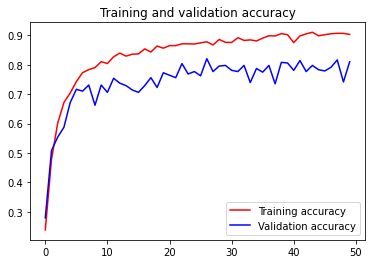

<Figure size 432x288 with 0 Axes>

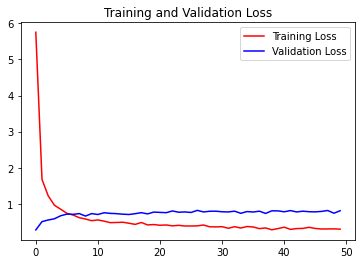

<Figure size 432x288 with 0 Axes>

In [78]:
# Plot the training and validation accuracies for each epoch
# Accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

